### SOCIAL MEDIA SENTIMENT ANALYSIS FOR BRAND MONITORING

In [2]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


#### Step 1: Importing all required Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

#### Step 2: Load the Dataset

In [4]:
dataset_path = r"C:\\Users\\srira\\Downloads\\Optifyx Technology Internship\\sentimentdataset.csv"
data = pd.read_csv(dataset_path)

#### Step 3: Data Exploration (EDA)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [6]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [7]:
data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Text', 'Sentiment', 'Timestamp', 'User',
       'Platform', 'Hashtags', 'Retweets', 'Likes', 'Country', 'Year', 'Month',
       'Day', 'Hour'],
      dtype='object')

In [9]:
data.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [10]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64


In [11]:
# Unique values in key columns
print("Unique Sentiments:", data['Sentiment'].unique())
print("Unique Platforms:", data['Platform'].unique())

Unique Sentiments: [' Positive  ' ' Negative  ' ' Neutral   ' ' Anger        '
 ' Fear         ' ' Sadness      ' ' Disgust      ' ' Happiness    '
 ' Joy          ' ' Love         ' ' Amusement    ' ' Enjoyment    '
 ' Admiration   ' ' Affection    ' ' Awe          ' ' Disappointed '
 ' Surprise     ' ' Acceptance   ' ' Adoration    ' ' Anticipation '
 ' Bitter       ' ' Calmness     ' ' Confusion    ' ' Excitement   '
 ' Kind         ' ' Pride        ' ' Shame        ' ' Confusion '
 ' Excitement ' ' Shame ' ' Elation       ' ' Euphoria      '
 ' Contentment   ' ' Serenity      ' ' Gratitude     ' ' Hope          '
 ' Empowerment   ' ' Compassion    ' ' Tenderness    ' ' Arousal       '
 ' Enthusiasm    ' ' Fulfillment  ' ' Reverence     ' ' Compassion'
 ' Fulfillment   ' ' Reverence ' ' Elation   ' ' Despair         '
 ' Grief           ' ' Loneliness      ' ' Jealousy        '
 ' Resentment      ' ' Frustration     ' ' Boredom         '
 ' Anxiety         ' ' Intimidation    ' ' He

#### Step 4: Data Visualization

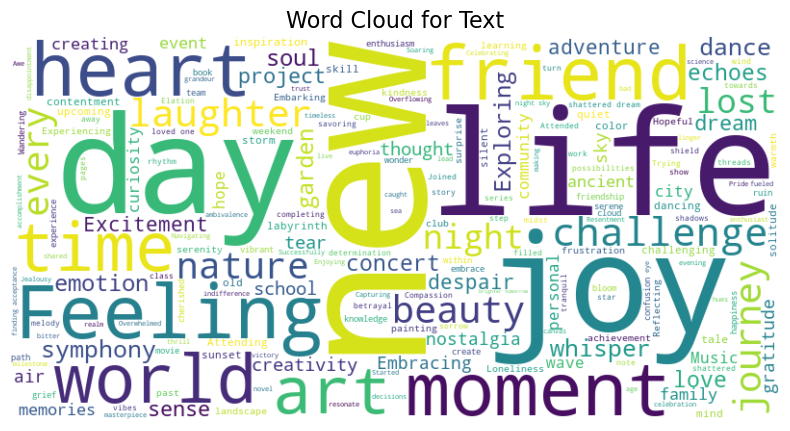

In [12]:
# 1. Word Clouds
def generate_wordcloud(data_column, title):
    text = " ".join(data_column.dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()
generate_wordcloud(data['Text'], "Word Cloud for Text")

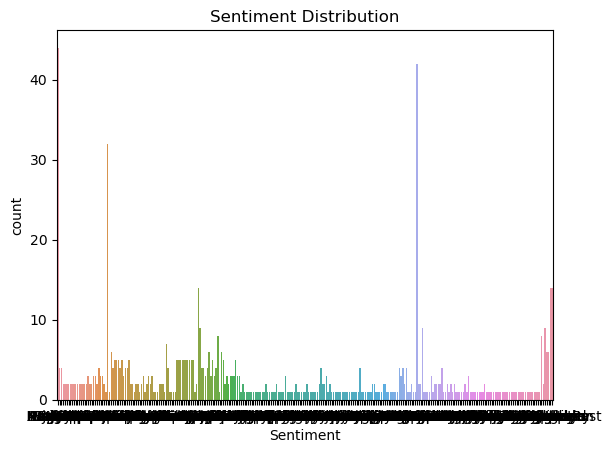

In [33]:
# 2. Bar Plots
sns.countplot(x='Sentiment', data=data)
plt.title("Sentiment Distribution")
plt.show()

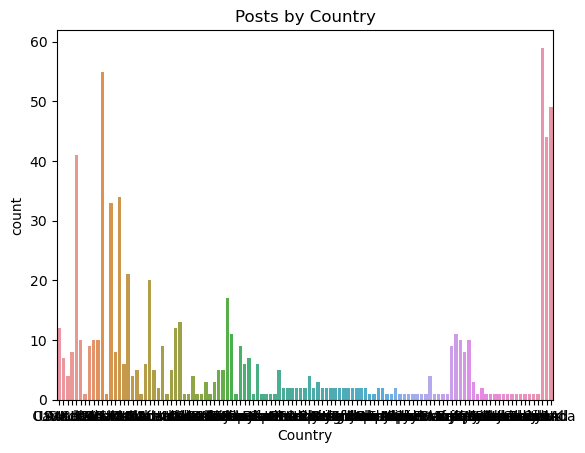

In [34]:
sns.countplot(x='Country', data=data)
plt.title("Posts by Country")
plt.show()

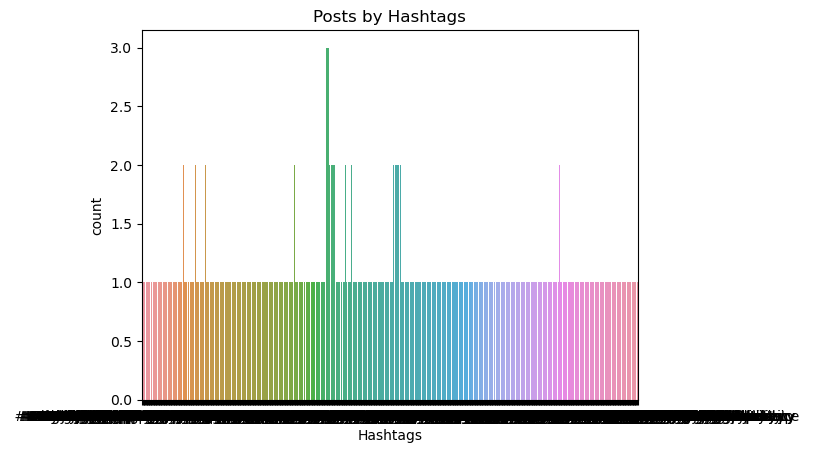

In [35]:
sns.countplot(x='Hashtags', data=data)
plt.title("Posts by Hashtags")
plt.show()

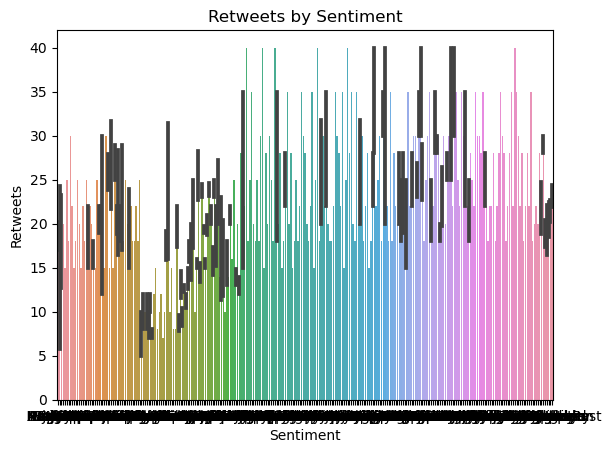

In [36]:
sns.barplot(x='Sentiment', y='Retweets', data=data)
plt.title("Retweets by Sentiment")
plt.show()

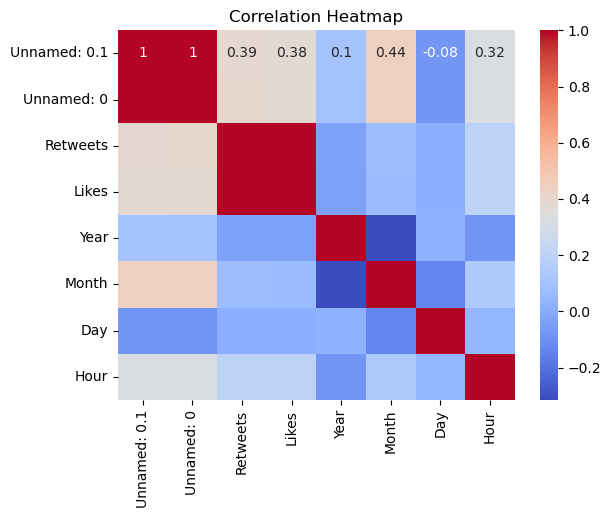

In [18]:
# 3. Heatmap
data_corr = data.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(data_corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

C:\Users\srira\AppData\Local\Temp\ipykernel_8720\343448901.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Hour', y='Retweets', data=data, ci=None)
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\srira\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


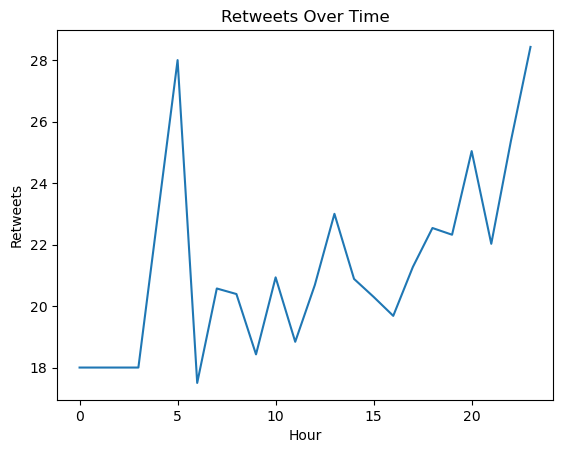

In [19]:
# 4. Time Series Plot
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['Hour'] = data['Timestamp'].dt.hour
sns.lineplot(x='Hour', y='Retweets', data=data, ci=None)
plt.title("Retweets Over Time")
plt.show()

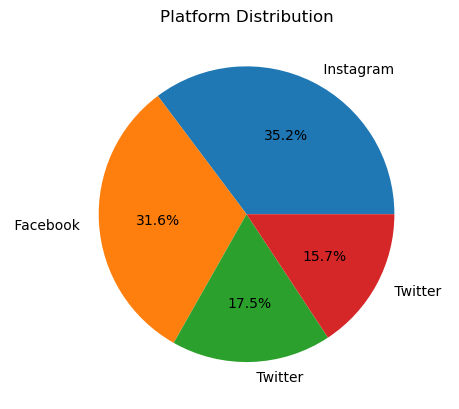

In [20]:
# 5. Pie Chart
platform_counts = data['Platform'].value_counts()
platform_counts.plot.pie(autopct='%1.1f%%')
plt.title("Platform Distribution")
plt.ylabel("")
plt.show()

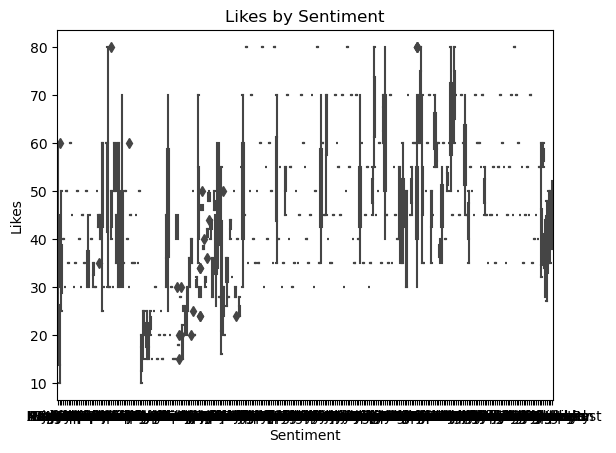

In [21]:
# 7. Box Plot
sns.boxplot(x='Sentiment', y='Likes', data=data)
plt.title("Likes by Sentiment")
plt.show()

#### Step-6: Relationships between columns

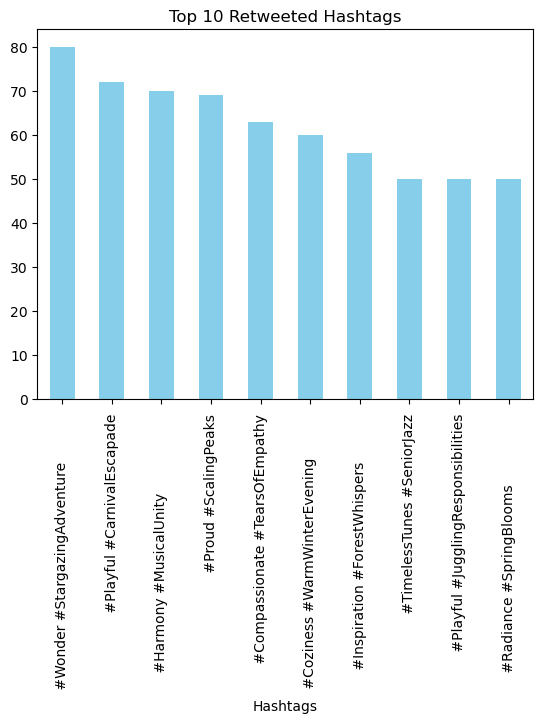

In [22]:
def top_k_barplot(data, column, value_column, k, title):
    top_k = data.groupby(column)[value_column].sum().sort_values(ascending=False).head(k)
    top_k.plot(kind='bar', color='skyblue')
    plt.title(title)
    plt.show()

top_k_barplot(data, 'Hashtags', 'Retweets', 10, "Top 10 Retweeted Hashtags")

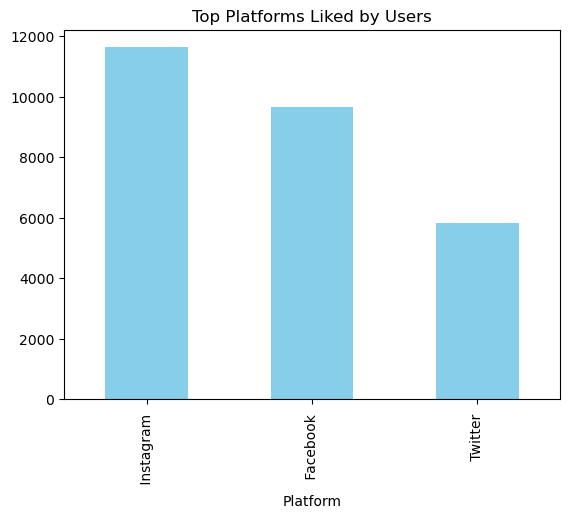

In [23]:
top_k_barplot(data, 'Platform', 'Likes', 3, "Top Platforms Liked by Users")

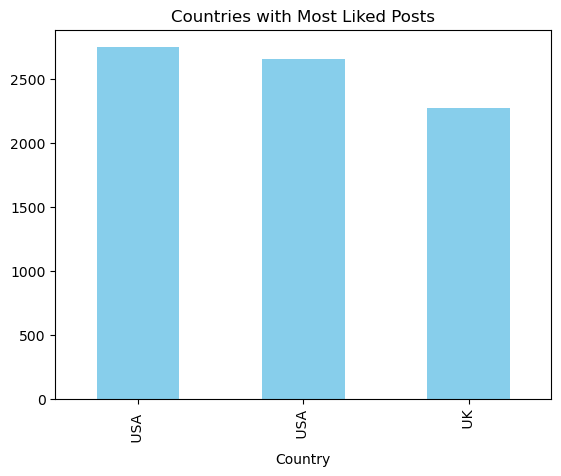

In [24]:
top_k_barplot(data, 'Country', 'Likes', 3, "Countries with Most Liked Posts")

#### Step-6: User Segmentation by Platform

In [42]:
data['Platform'] = data['Platform'].str.strip().str.title().fillna("Unknown")
print(data['Platform'].unique())

['Twitter' 'Instagram' 'Facebook']


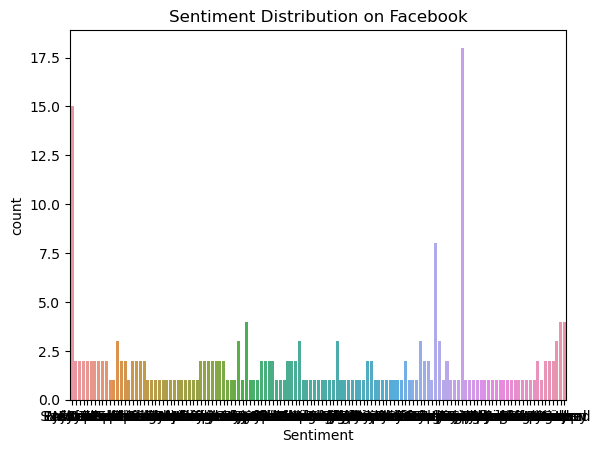

In [43]:
# Facebook
facebook_data = data[data['Platform'] == 'Facebook']
sns.countplot(x='Sentiment', data=facebook_data)
plt.title("Sentiment Distribution on Facebook")
plt.show()

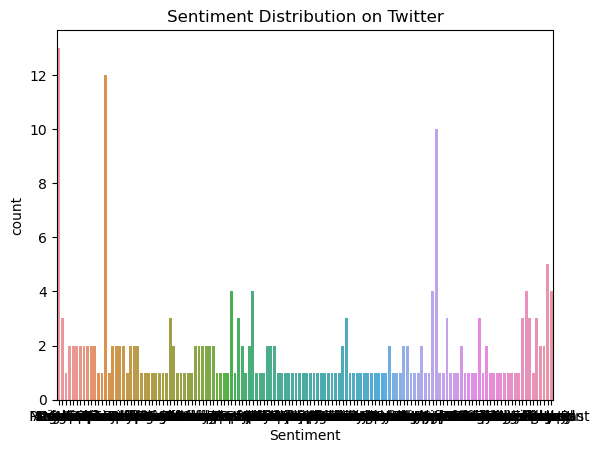

In [44]:
# Twitter
twitter_data = data[data['Platform'] == 'Twitter']
sns.countplot(x='Sentiment', data=twitter_data)
plt.title("Sentiment Distribution on Twitter")
plt.show()

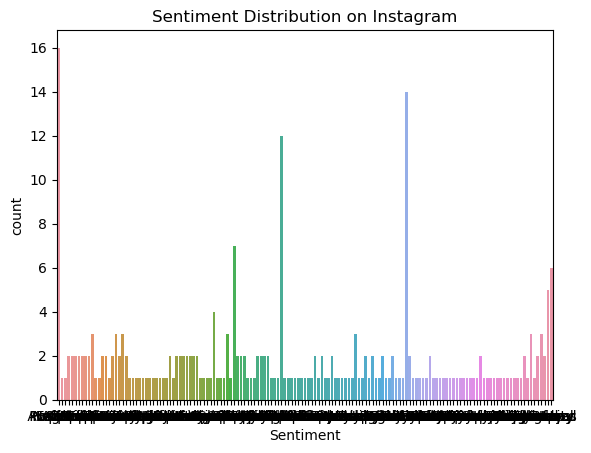

In [46]:
# Instagram
instagram_data = data[data['Platform'] == 'Instagram']
sns.countplot(x='Sentiment', data=instagram_data)
plt.title("Sentiment Distribution on Instagram")
plt.show()

#### Step 7: Performance Metrics

In [47]:
# Splitting data for modeling
data['Text'] = data['Text'].fillna("Unknown")  # Handling missing text
X = data['Text']
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [48]:
# Vectorizing text
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [49]:
# Training model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [50]:
# Predictions
y_pred = model.predict(X_test_vec)

In [51]:
# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Accuracy: 0.13636363636363635
Precision: 0.06487065779748706
Recall: 0.13636363636363635
F1 Score: 0.07163742275304141


C:\Users\srira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\srira\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


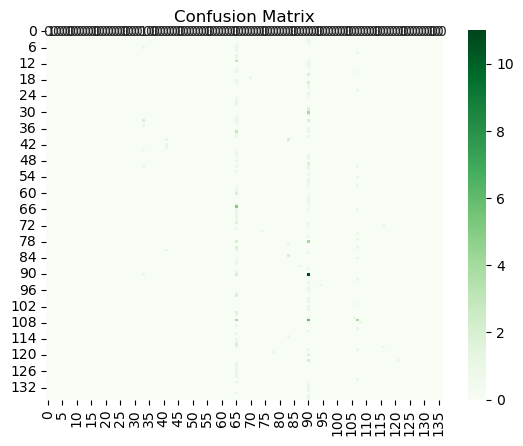

In [52]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix")
plt.show()